## ▶️ Dataset info updated from various comments:

* **Sex:** {1: male, 2: female}
* **Education**: {1: graduation, 2: university, 3: high_school, 4: others}
* **Marriage**: {1: married, 2: single, 3: divorced, 4: others}
* **Pay_1 - Pay_6**: {-2: No consumption, -1: Paid in full, 0: The use of revolving credit i.e min amt paid, 1: payment delay for one month, ...}
> **Note**: Pay_0 renamed to Pay_1
* **Bill_Amt_1 - Bill_Amt_6**: Amount of bill statement 
* **Pay_Amt_1 - Pay_Amt_6**:  Amount of previous payment

## ▶️ EDA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('/kaggle/input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv')

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
print('Shape:', df.shape, f'| Rows: {df.shape[0]}, Columns: {df.shape[1]}')

Shape: (30000, 25) | Rows: 30000, Columns: 25


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

Dtype looks good!

In [7]:
df = df.rename(columns={'PAY_0':'PAY_1'}) # Renaming PAY_0 to PAY_1 for sync up with BILL_AMT_ and PAY_AMT_ counterparts

In [8]:
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_1                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default.payment.next.month        2
dtype: int64

In [9]:
all_dependent_columns = list(df.columns)
all_dependent_columns.remove('ID') # Remove unwanted column
all_dependent_columns.remove('default.payment.next.month') # Remove dependent column
all_dependent_columns

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [10]:
cat_columns = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'] # Categorical columns
num_columns = [column for column in all_dependent_columns if column not in cat_columns] # Numerical columns

print('>> cat_columns: \n', cat_columns,)
print('>> num_colums: \n', num_columns)

>> cat_columns: 
 ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
>> num_colums: 
 ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [11]:
for col in cat_columns:
    print(f'>> Unique categories in {col}:', sorted(df[col].unique()))

>> Unique categories in SEX: [1, 2]
>> Unique categories in EDUCATION: [0, 1, 2, 3, 4, 5, 6]
>> Unique categories in MARRIAGE: [0, 1, 2, 3]
>> Unique categories in PAY_1: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
>> Unique categories in PAY_2: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
>> Unique categories in PAY_3: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
>> Unique categories in PAY_4: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
>> Unique categories in PAY_5: [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
>> Unique categories in PAY_6: [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


The range of values across all num_cols are pretty different. **Need standardization!**

In [13]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

No missing data!

In [14]:
df.duplicated().sum()

0

No duplicate data!

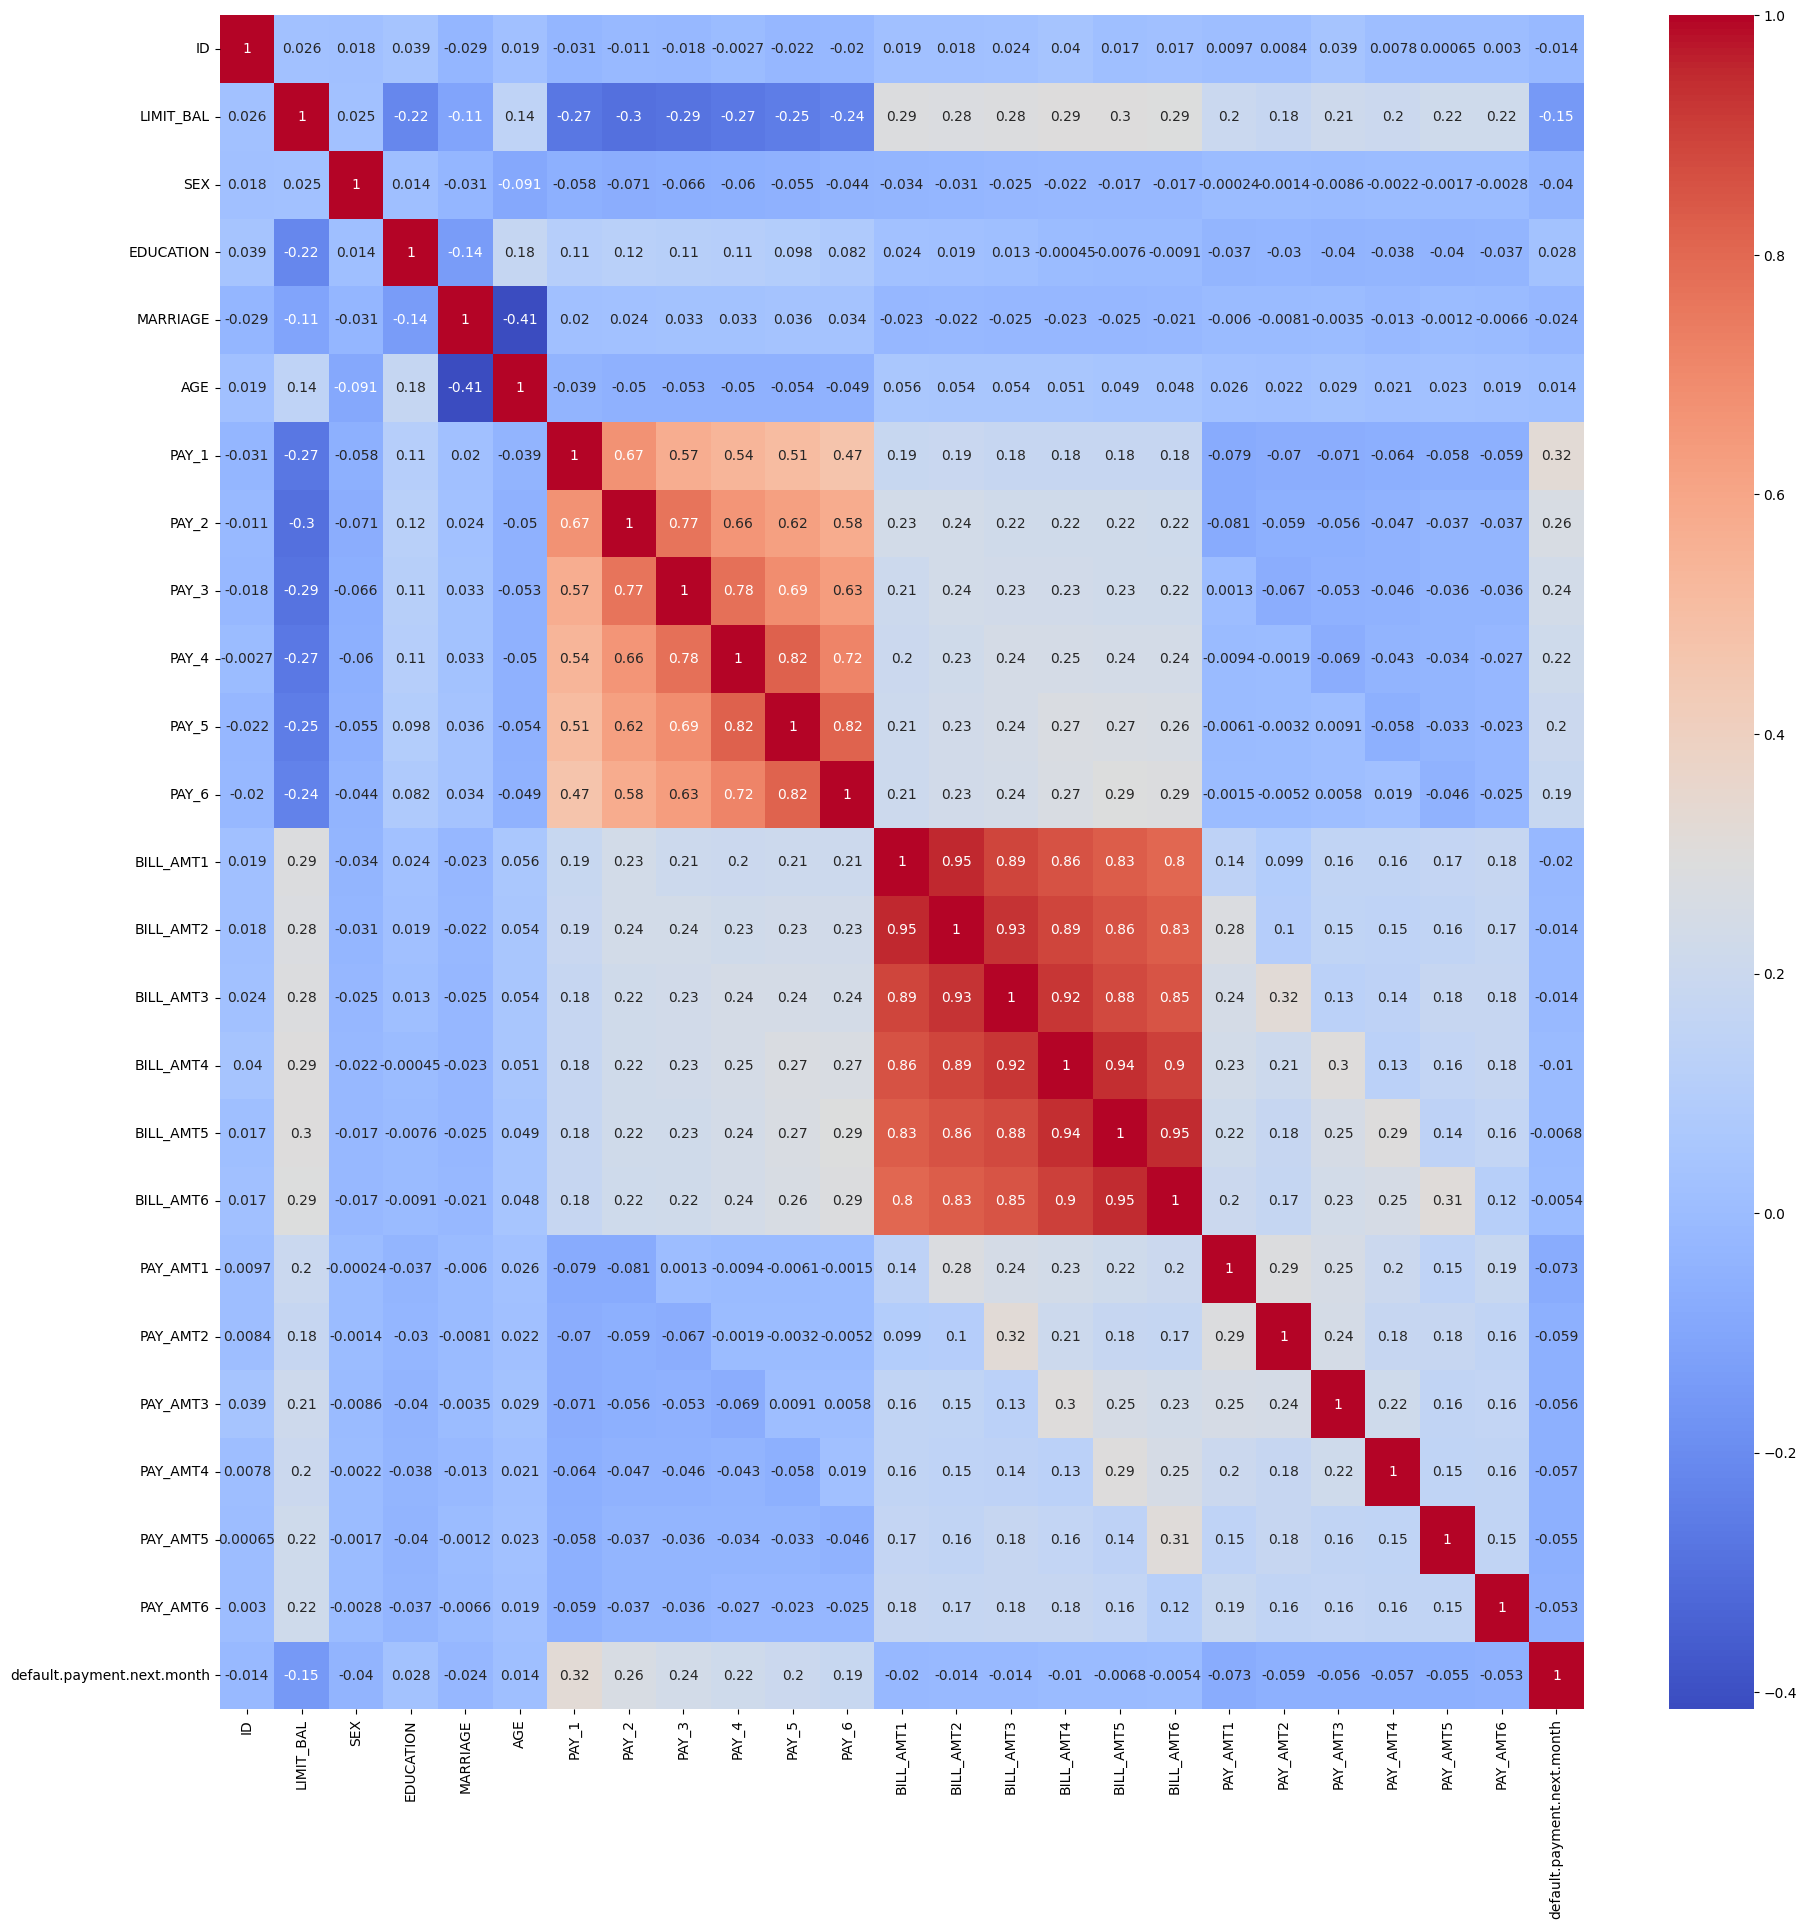

In [15]:
plt.figure(figsize=(22,22))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm');

High correlation among PAY_* and BILL_AMT_*

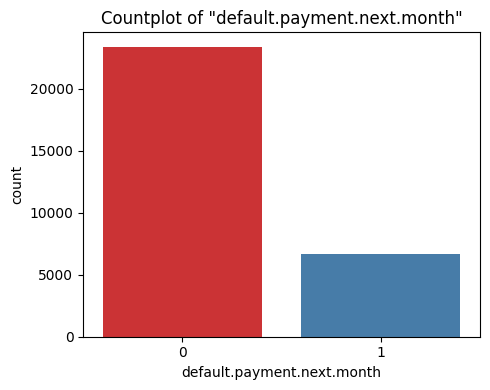

In [16]:
plt.figure(figsize=(5,4))

sns.countplot(data=df, x='default.payment.next.month', palette='Set1')
plt.title('Countplot of "default.payment.next.month"')

plt.tight_layout()
plt.show()

The dataset is imbalanced!

### Analysis of categorical columns

In [17]:
cat_columns

['SEX',
 'EDUCATION',
 'MARRIAGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6']

In [18]:
for col in cat_columns:
    print(f'>> Unique categories in {col}:', sorted(df[col].unique()))

>> Unique categories in SEX: [1, 2]
>> Unique categories in EDUCATION: [0, 1, 2, 3, 4, 5, 6]
>> Unique categories in MARRIAGE: [0, 1, 2, 3]
>> Unique categories in PAY_1: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
>> Unique categories in PAY_2: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
>> Unique categories in PAY_3: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
>> Unique categories in PAY_4: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
>> Unique categories in PAY_5: [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
>> Unique categories in PAY_6: [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]


In [19]:
df['EDUCATION'] = df['EDUCATION'].apply(lambda x:4 if x not in [1, 2, 3] else x)
df['MARRIAGE'] = df['MARRIAGE'].apply(lambda x:4 if x==0 else x) # Casting 4 for 'others'

In [20]:
for col in cat_columns:
    print(f'>> Unique categories in {col}:', sorted(df[col].unique()))

>> Unique categories in SEX: [1, 2]
>> Unique categories in EDUCATION: [1, 2, 3, 4]
>> Unique categories in MARRIAGE: [1, 2, 3, 4]
>> Unique categories in PAY_1: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
>> Unique categories in PAY_2: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
>> Unique categories in PAY_3: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
>> Unique categories in PAY_4: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
>> Unique categories in PAY_5: [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
>> Unique categories in PAY_6: [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]


In [21]:
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         4
MARRIAGE                          4
AGE                              56
PAY_1                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default.payment.next.month        2
dtype: int64

In [22]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


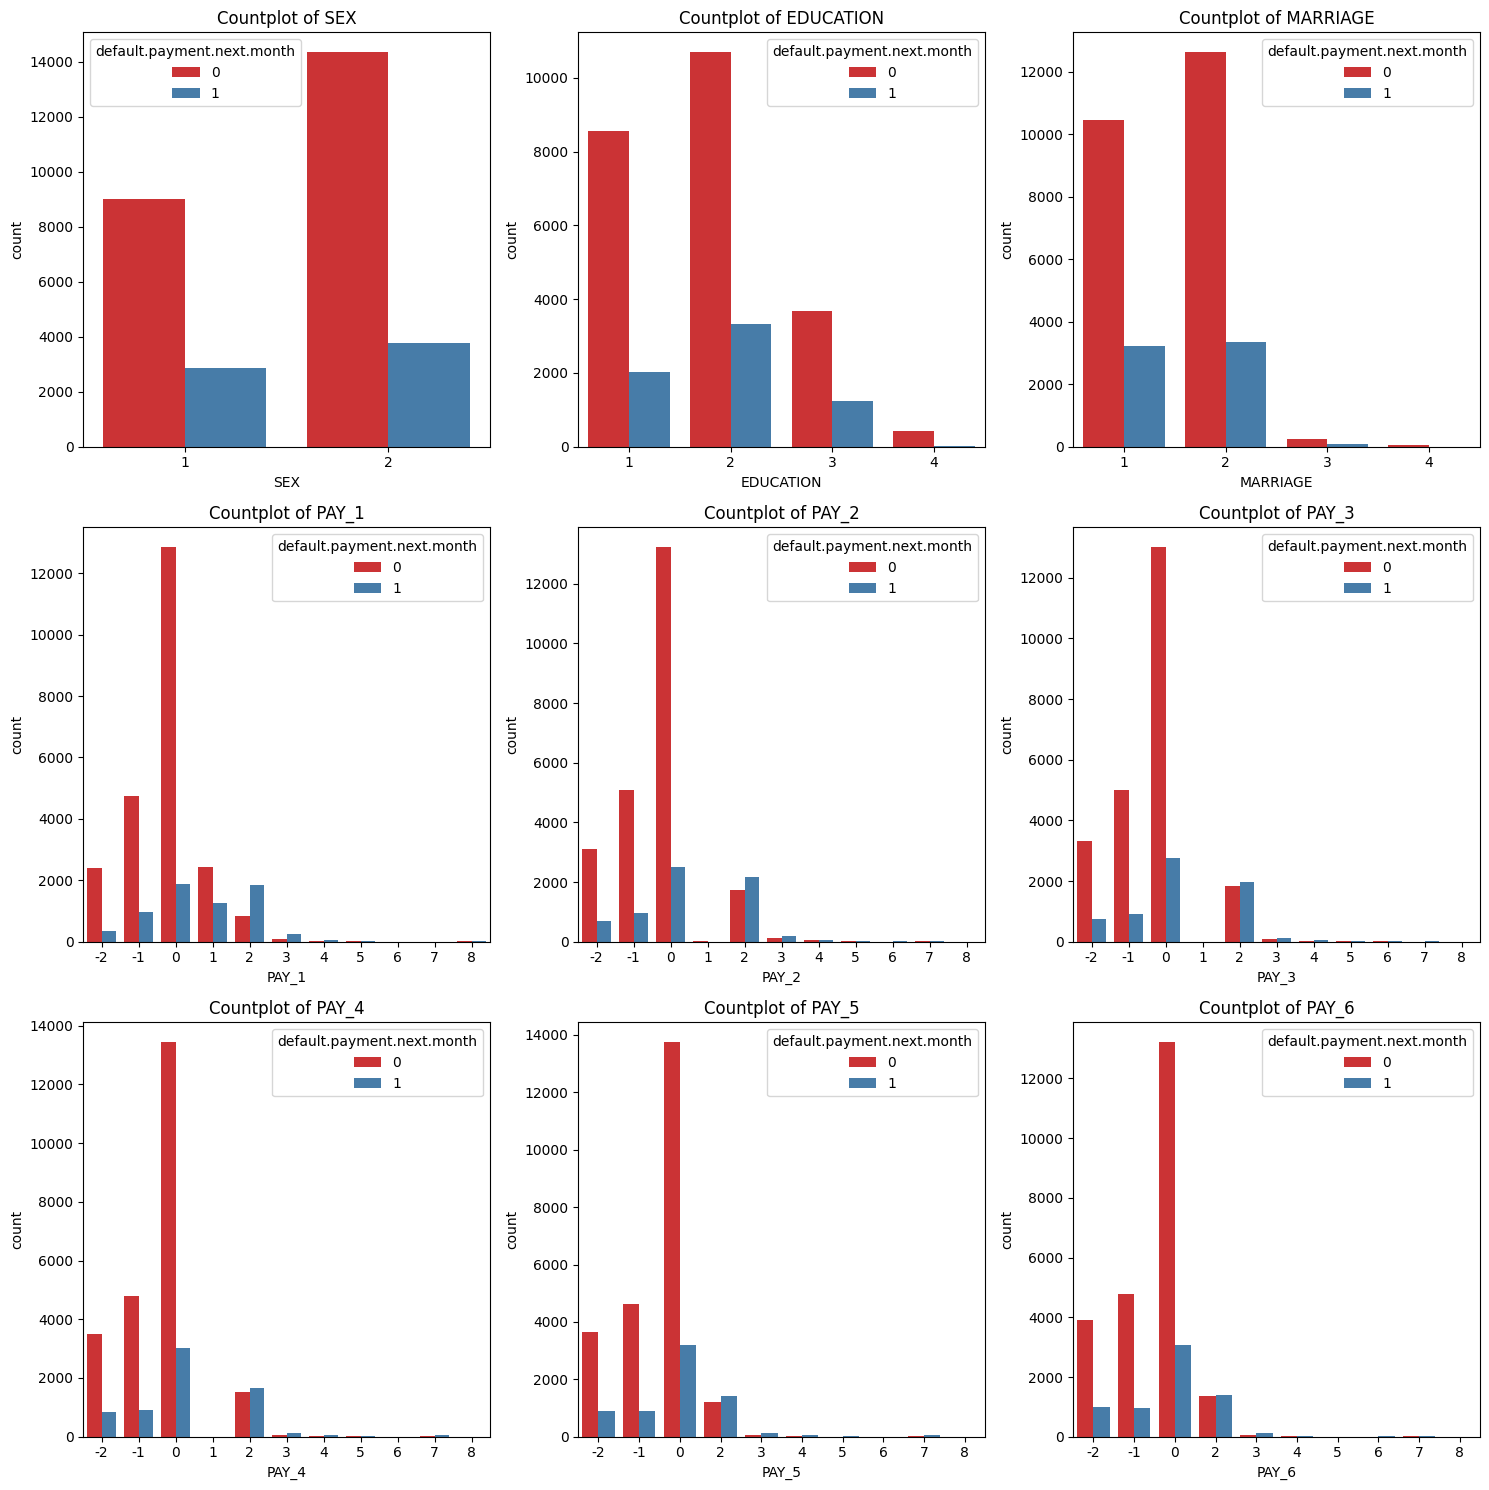

In [23]:
# Countplot of categorical columns

fig, axis = plt.subplots(3,3,figsize=(15,15))

for i, ax in enumerate(axis.flatten()):
    if i < len(cat_columns):
        sns.countplot(data=df, x=cat_columns[i], ax=ax, palette='Set1', hue='default.payment.next.month')
        ax.set_title(f'Countplot of {cat_columns[i]}')

plt.tight_layout()
plt.show()

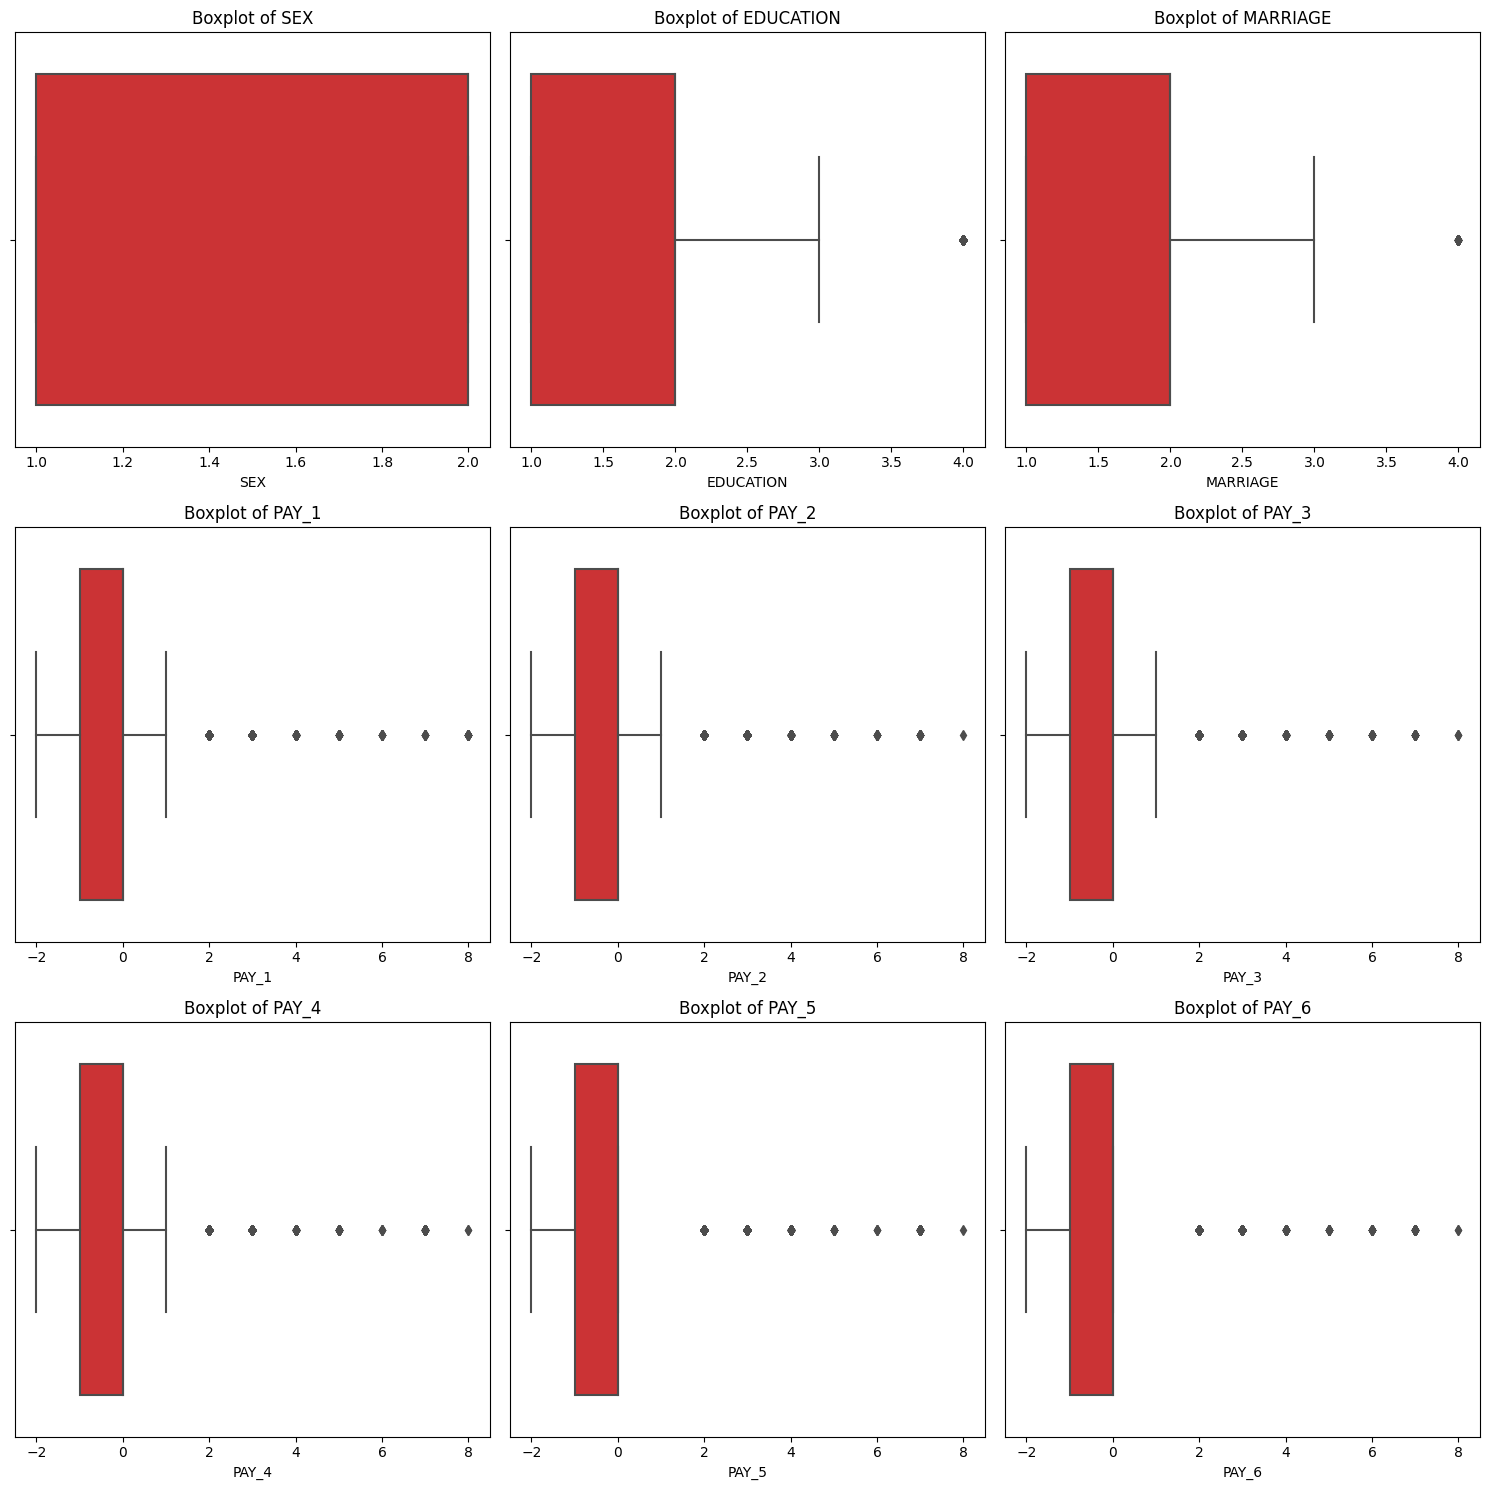

In [24]:
# Boxplot of categorical columns

fig, axis = plt.subplots(3,3,figsize=(15,15))

for i, ax in enumerate(axis.flatten()):
    if i < len(cat_columns):
        sns.boxplot(data=df, x=cat_columns[i], ax=ax, palette='Set1', hue='default.payment.next.month')
        ax.set_title(f'Boxplot of {cat_columns[i]}')
        
plt.tight_layout()
plt.show()

### Analysis of Numerical columns

In [25]:
num_columns

['LIMIT_BAL',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

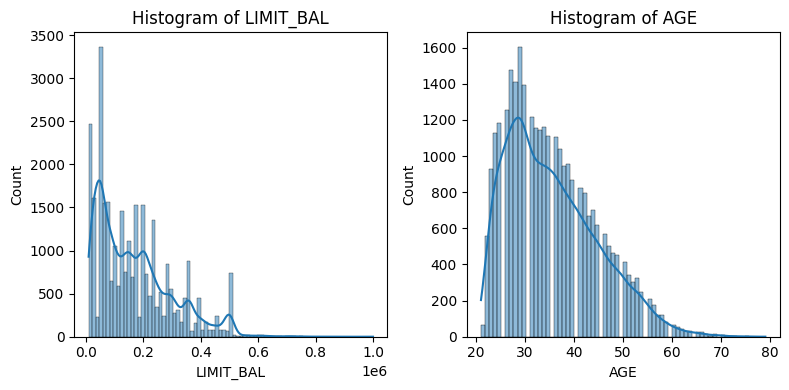

In [26]:
# Histplot of Numerical columns - ['LIMIT_BAL', 'AGE']

fig, axis = plt.subplots(1,2,figsize=(8,4))

for i, ax in enumerate(axis.flatten()):
    if i < len(num_columns[:2]):
        sns.histplot(data=df, x=num_columns[:2][i], ax=ax, kde=True)
        ax.set_title(f'Histogram of {num_columns[i]}')
        
plt.tight_layout()
plt.show()

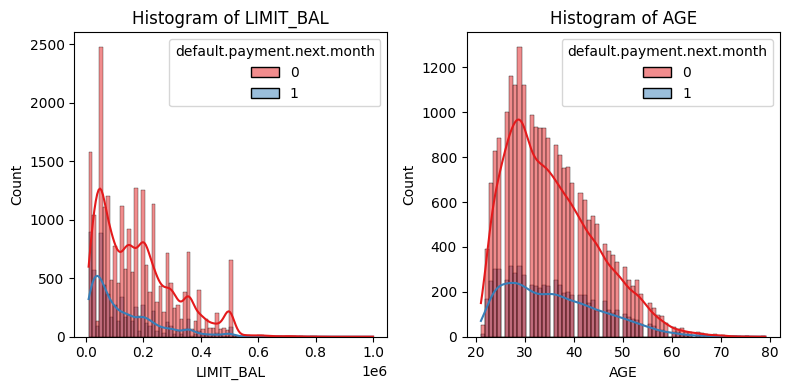

In [27]:
# Histplot of Numerical columns with hue - ['LIMIT_BAL', 'AGE']

fig, axis = plt.subplots(1,2,figsize=(8,4))

for i, ax in enumerate(axis.flatten()):
    if i < len(num_columns[:2]):
        sns.histplot(data=df, x=num_columns[:2][i], ax=ax, kde=True, palette='Set1', hue='default.payment.next.month')
        ax.set_title(f'Histogram of {num_columns[i]}')
        
plt.tight_layout()
plt.show()

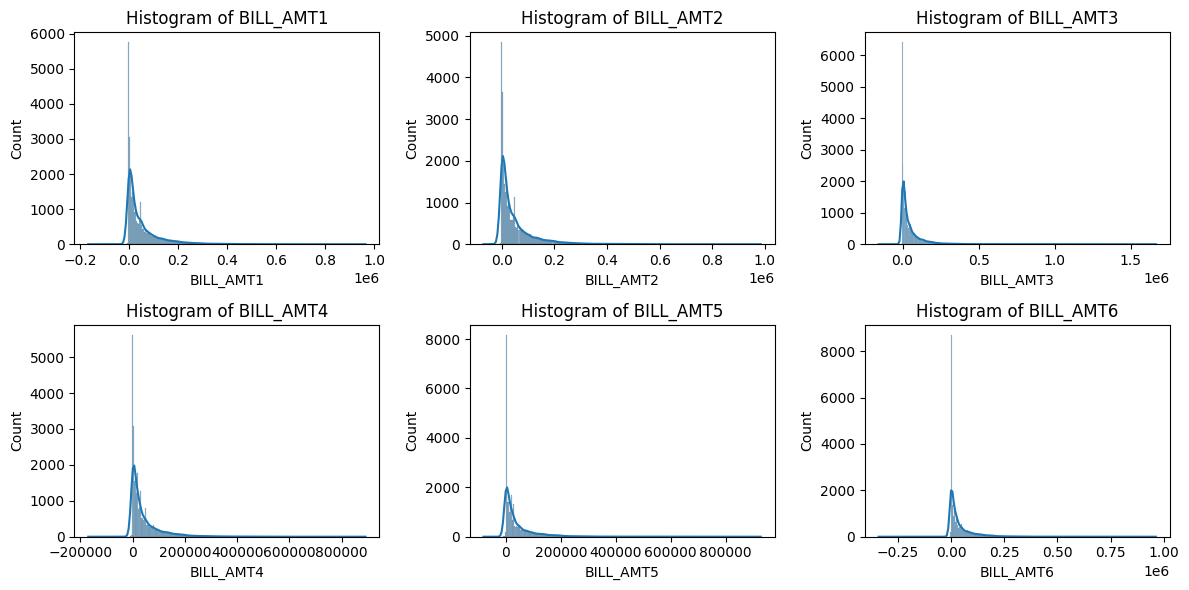

In [28]:
# Histplot of rest of the Numerical columns - BILL_AMT

fig, axis = plt.subplots(2,3,figsize=(12,6))

for i, ax in enumerate(axis.flatten()):
    if i < len(num_columns[2:8]):
        sns.histplot(data=df, x=num_columns[2:8][i], ax=ax, kde=True)
        ax.set_title(f'Histogram of {num_columns[2:8][i]}')
        
plt.tight_layout()
plt.show()

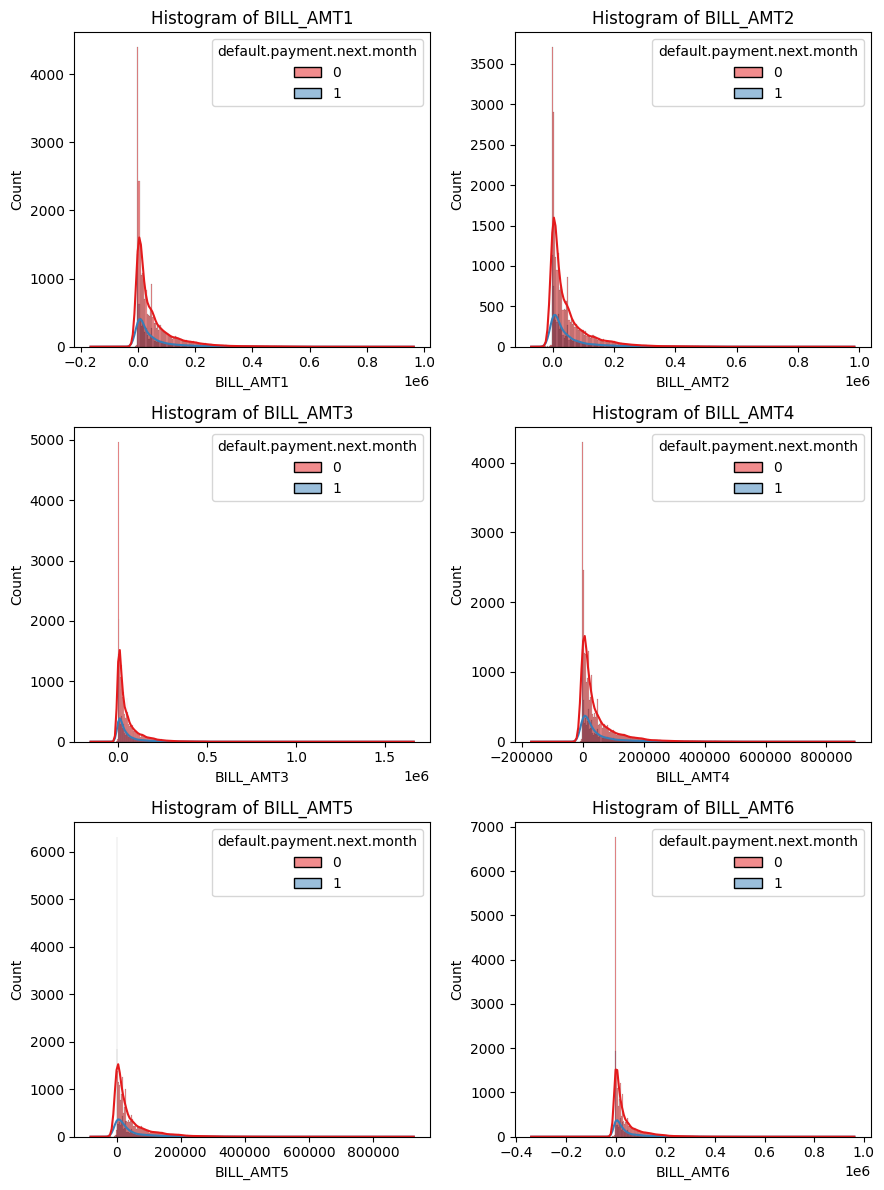

In [29]:
# Histplot of rest of the Numerical columns with hue - BILL_AMT

fig, axis = plt.subplots(3,2,figsize=(9,12))

for i, ax in enumerate(axis.flatten()):
    if i < len(num_columns[2:8]):
        sns.histplot(data=df, x=num_columns[2:8][i], ax=ax, kde=True, palette='Set1', hue='default.payment.next.month')
        ax.set_title(f'Histogram of {num_columns[2:8][i]}')
        
plt.tight_layout()
plt.show()

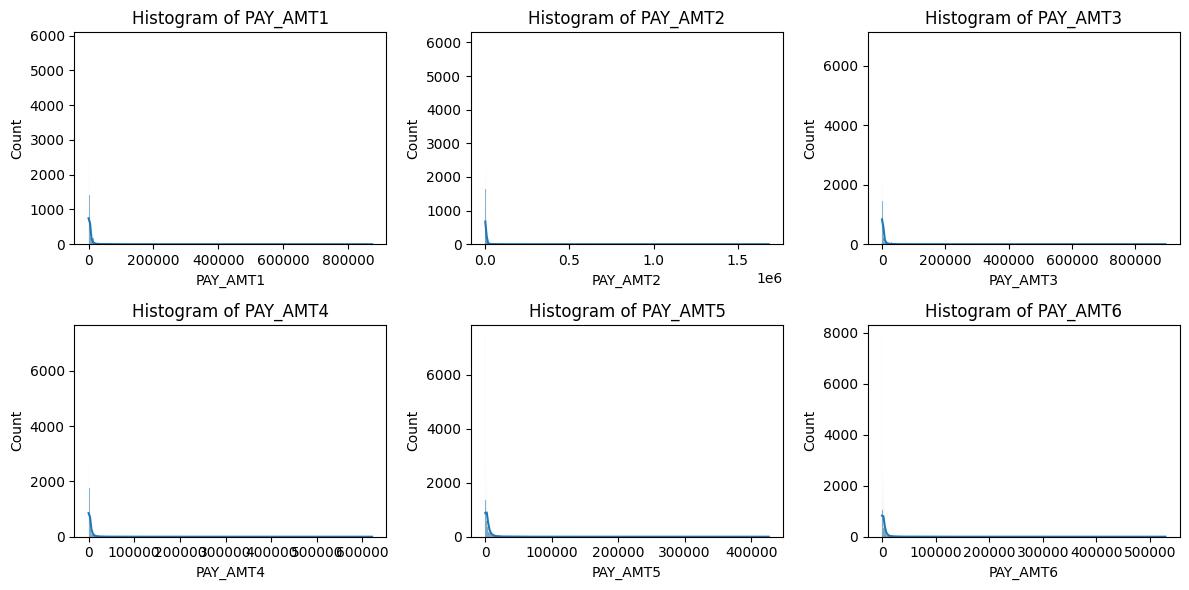

In [30]:
# Histplot of rest of the Numerical columns - PAY_AMT

fig, axis = plt.subplots(2,3,figsize=(12,6))

for i, ax in enumerate(axis.flatten()):
    if i < len(num_columns[8:]):
        sns.histplot(data=df, x=num_columns[8:][i], ax=ax, kde=True)
        ax.set_title(f'Histogram of {num_columns[8:][i]}')
        
plt.tight_layout()
plt.show()

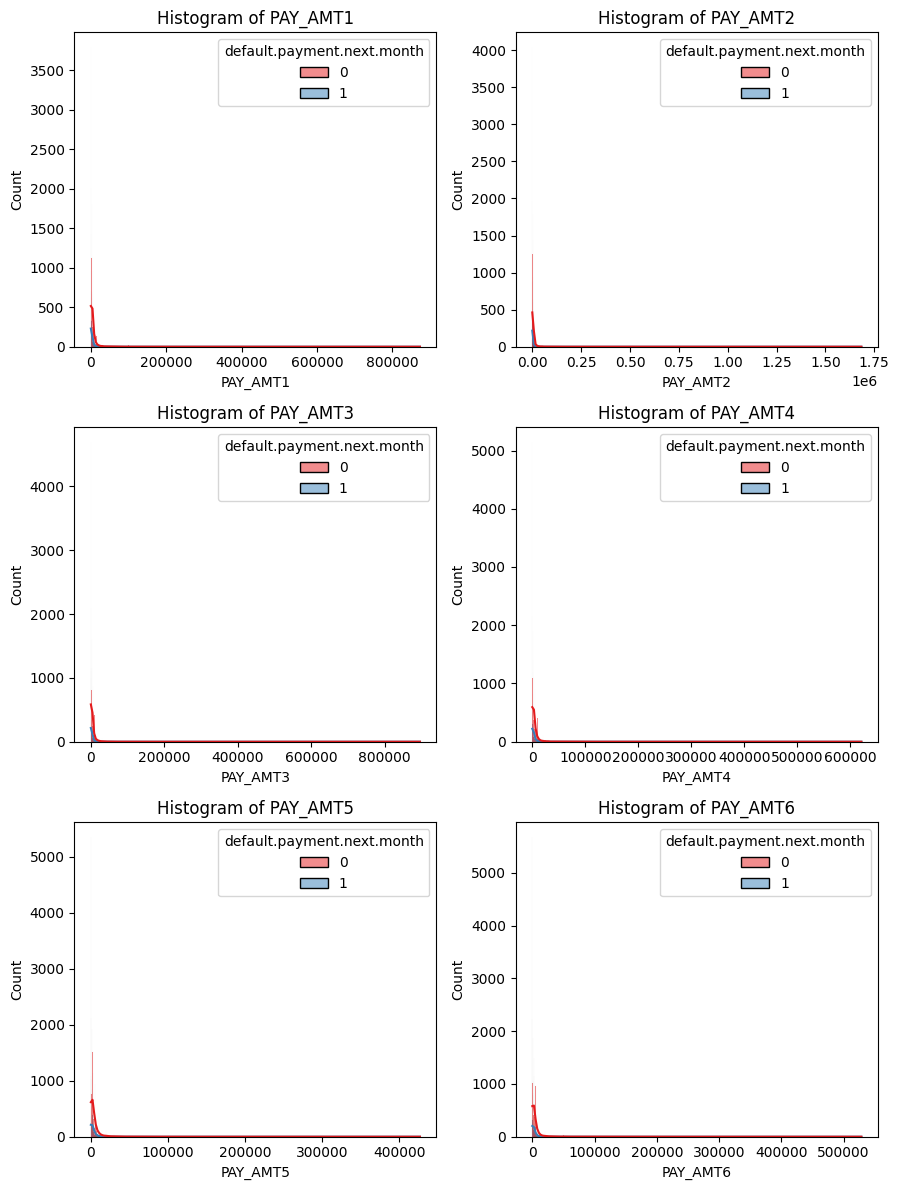

In [31]:
# Histplot of rest of the Numerical columns with hue - PAY_AMT

fig, axis = plt.subplots(3,2,figsize=(9,12))

for i, ax in enumerate(axis.flatten()):
    if i < len(num_columns[8:]):
        sns.histplot(data=df, x=num_columns[8:][i], ax=ax, kde=True, palette='Set1', hue='default.payment.next.month')
        ax.set_title(f'Histogram of {num_columns[8:][i]}')
        
plt.tight_layout()
plt.show()

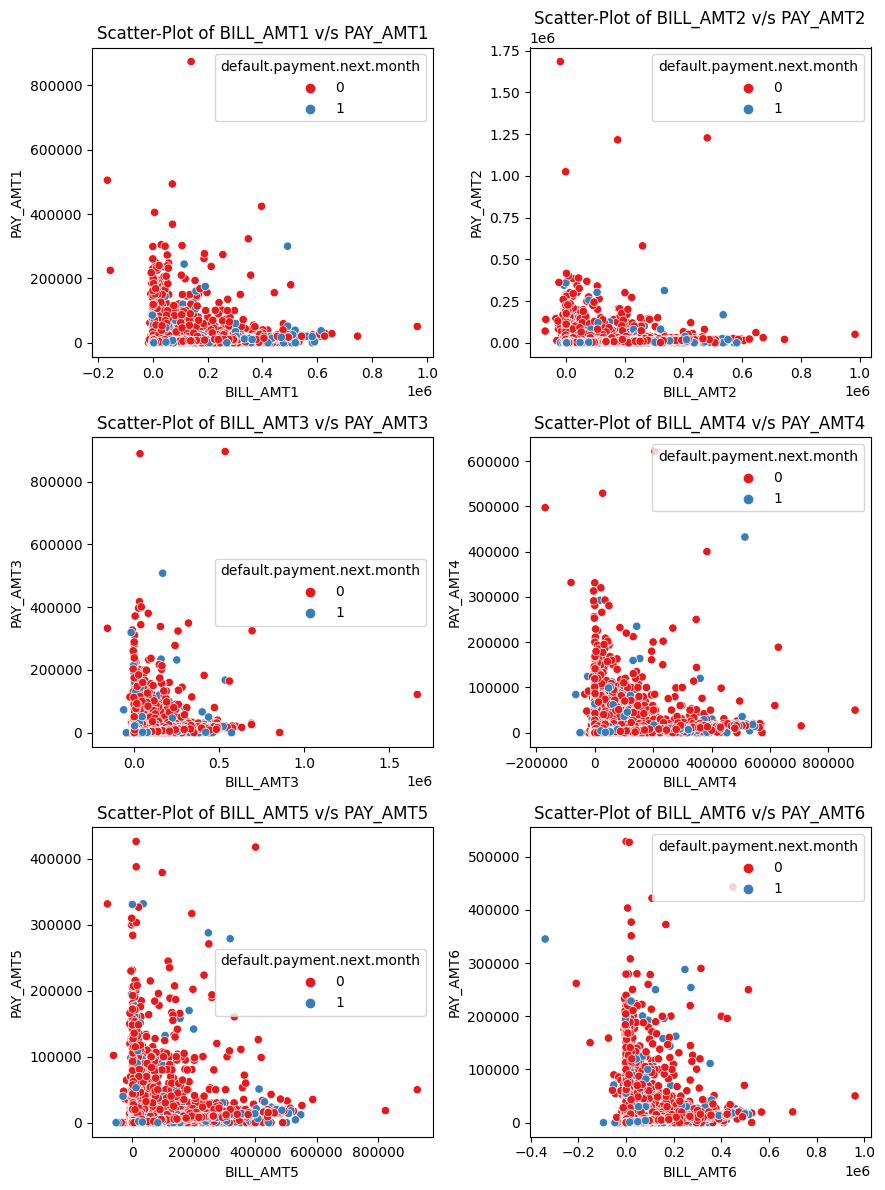

In [32]:
# Scatterplot of Bill_Amt v/s Pay_Amt

fig, axis = plt.subplots(3,2,figsize=(9,12))

for i, ax in enumerate(axis.flatten()):
    if i < len(num_columns[2:]):
        sns.scatterplot(data=df, x=num_columns[2:][i], y=num_columns[2:][i+6], ax=ax, palette='Set1', hue='default.payment.next.month')
        ax.set_title(f'Scatter-Plot of {num_columns[2:][i]} v/s {num_columns[2:][i+6]}')
        
plt.tight_layout()
plt.show()

## ▶️ Dataset preparation

In [33]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler   

In [34]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Encode categorical columns

In [35]:
oh_encoder = OneHotEncoder()

In [36]:
encoded_data = oh_encoder.fit_transform(df[['SEX', 'EDUCATION', 'MARRIAGE']]).toarray()
encoded_df = pd.DataFrame(encoded_data, columns=oh_encoder.get_feature_names_out())

In [37]:
encoded_df.head()

,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,MARRIAGE_4
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [38]:
df = df.join(encoded_df)

In [39]:
df = df.drop(['SEX', 'EDUCATION', 'MARRIAGE'], axis=1)

In [40]:
df.head()

,ID,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,MARRIAGE_4
0,1,20000.0,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,120000.0,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5,50000.0,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [41]:
X = df.drop(['ID', 'default.payment.next.month'], axis=1)
y = df['default.payment.next.month']

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [44]:
X_train

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,MARRIAGE_4
16831,120000.0,49,0,-1,-1,-1,-1,-1,119440.0,3844.0,2290.0,780.0,8190.0,4600.0,3844.0,2299.0,780.0,8190.0,4600.0,1081.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4222,30000.0,38,2,0,0,0,0,0,69707.0,71904.0,62630.0,57406.0,46231.0,73262.0,4000.0,5000.0,8000.0,1460.0,40000.0,10000.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8736,90000.0,39,0,0,0,0,0,0,45709.0,45045.0,42151.0,37842.0,30849.0,28061.0,2000.0,2000.0,1200.0,1018.0,1200.0,710.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
27880,130000.0,26,0,0,2,2,2,0,121329.0,128791.0,127881.0,133130.0,127159.0,131069.0,11000.0,2600.0,9000.0,0.0,6000.0,5000.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
29290,50000.0,26,2,0,0,0,0,0,49644.0,94883.0,42097.0,32394.0,16658.0,17006.0,2047.0,5728.0,1300.0,1194.0,617.0,650.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,50000.0,32,0,0,0,0,0,0,52475.0,53600.0,55739.0,55957.0,29238.0,6119.0,2000.0,3000.0,1591.0,72.0,1134.0,73421.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5390,200000.0,37,2,2,2,2,2,2,157131.0,166590.0,168386.0,164182.0,169029.0,172084.0,13500.0,6000.0,0.0,7500.0,6000.0,4000.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
860,50000.0,26,-2,-2,-2,-2,-2,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15795,70000.0,25,0,0,0,0,2,2,73939.0,70488.0,51152.0,35122.0,28633.0,28039.0,3000.0,2000.0,4500.0,1200.0,0.0,1200.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


### Scale numerical columns

In [45]:
scalar = StandardScaler()

In [46]:
num_columns

['LIMIT_BAL',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [47]:
scaled_num_array_train = scalar.fit_transform(X_train[num_columns])
scaled_num_array_test = scalar.transform(X_test[num_columns])

In [48]:
num_columns

['LIMIT_BAL',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [49]:
mask = num_columns.copy()
mask.extend(['ID', 'default.payment.next.month'])

cat_columns_updated = [col for col in df.columns if col not in mask]
cat_columns_updated

['PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'SEX_1',
 'SEX_2',
 'EDUCATION_1',
 'EDUCATION_2',
 'EDUCATION_3',
 'EDUCATION_4',
 'MARRIAGE_1',
 'MARRIAGE_2',
 'MARRIAGE_3',
 'MARRIAGE_4']

In [50]:
train_data = np.c_[scaled_num_array_train, np.array(X_train[cat_columns_updated])]
test_data  = np.c_[scaled_num_array_test, np.array(X_test[cat_columns_updated])]

In [51]:
y_train, y_test

(16831    1
 4222     0
 8736     1
 27880    0
 29290    1
         ..
 29802    0
 5390     1
 860      0
 15795    1
 23654    1
 Name: default.payment.next.month, Length: 20100, dtype: int64,
 2308     0
 22404    0
 23397    0
 25058    0
 2664     1
         ..
 3672     1
 9812     0
 19631    0
 27301    0
 18451    0
 Name: default.payment.next.month, Length: 9900, dtype: int64)

In [52]:
pd.DataFrame(train_data, columns=X_train.columns)

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,MARRIAGE_4
0,-0.365093,1.464785,0.935500,-0.636379,-0.642576,-0.661257,-0.529514,-0.579208,-0.105018,-0.145558,-0.242409,0.201062,-0.014852,-0.233621,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,-1.061279,0.271955,0.256331,0.324404,0.228168,0.224623,0.099678,0.583327,-0.095828,-0.039170,0.152840,-0.212528,2.237818,0.268573,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.597155,0.380394,-0.071392,-0.054757,-0.067356,-0.081444,-0.154738,-0.181984,-0.213650,-0.157335,-0.219417,-0.239691,-0.231210,-0.254511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.287739,-1.029313,0.961297,1.127461,1.169781,1.409281,1.438216,1.562072,0.316551,-0.133702,0.207584,-0.302252,0.074237,-0.012958,0.0,0.0,2.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,-0.906571,-1.029313,-0.017655,0.648791,-0.068136,-0.166675,-0.389455,-0.369159,-0.210882,-0.010496,-0.213942,-0.228875,-0.268309,-0.257889,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20095,-0.906571,-0.378679,0.021006,0.066011,0.128727,0.201954,-0.181383,-0.553489,-0.213650,-0.117947,-0.198012,-0.297827,-0.235410,3.839564,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
20096,0.253740,0.163516,1.450220,1.661058,1.754294,1.895071,2.130740,2.256508,0.463829,0.000218,-0.285109,0.158658,0.074237,-0.069264,2.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
20097,-0.906571,-1.029313,-0.695608,-0.690644,-0.675622,-0.673460,-0.664976,-0.657092,-0.331473,-0.236112,-0.285109,-0.302252,-0.307572,-0.294488,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
20098,-0.751863,-1.137752,0.314125,0.304414,0.062534,-0.123997,-0.191390,-0.182356,-0.154739,-0.157335,-0.038763,-0.228507,-0.307572,-0.226921,0.0,0.0,0.0,0.0,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [53]:
pd.DataFrame(test_data, columns=X_test.columns)

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,MARRIAGE_4
0,-1.061279,-1.137752,-0.574559,-0.548602,-0.508501,-0.476653,-0.438115,-0.406035,-0.243106,-0.157335,-0.202994,-0.210070,-0.212120,-0.181876,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.133030,-1.029313,1.171699,1.083134,1.008202,0.915715,0.620849,0.651086,-0.067197,-0.069302,-0.112064,-0.139582,-0.137731,-0.144207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.751863,-0.378679,0.261999,0.284538,0.313309,0.417785,0.494650,0.531686,-0.188260,-0.113535,-0.120878,-0.152426,-0.148485,-0.150682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,-0.287739,1.464785,-0.413223,-0.423048,-0.442250,-0.409101,-0.479134,-0.539521,-0.236626,-0.164898,0.098863,-0.300593,0.138571,-0.046291,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.906571,0.055077,0.591198,-0.018195,-0.064326,-0.367236,-0.329299,-0.327965,-0.213650,-0.177029,-0.230365,-0.191634,-0.307572,-0.238182,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9895,-0.519801,-1.029313,-0.336816,-0.691675,-0.676675,-0.674602,-0.666183,-0.658328,-0.331473,-0.236112,-0.285109,-0.302252,-0.307572,-0.294488,-1.0,-1.0,-2.0,-2.0,-2.0,-2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9896,-0.442447,-0.378679,0.809289,0.829866,0.535296,0.067600,0.143906,0.122525,-0.104606,-0.117120,-0.194837,-0.086362,-0.307572,-0.200795,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9897,0.021678,0.597272,0.575725,0.651064,0.745867,0.890512,1.027101,1.114833,-0.125284,-0.039170,-0.066134,-0.056434,-0.053033,-0.069264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9898,-1.061279,-0.595557,-0.286015,-0.268696,-0.263469,-0.677043,-0.269177,-0.205789,-0.222134,-0.196723,-0.192154,1.225511,-0.084850,-0.125570,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


## ▶️ Model Training and Predictions/Evaluation

In [54]:
from sklearn.metrics import accuracy_score 

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rfc = RandomForestClassifier()

In [57]:
rfc.fit(train_data, y_train)

RandomForestClassifier()

In [58]:
predictions  = rfc.predict(test_data)

In [59]:
print(f'>> Random Forest classifier accuracy: {accuracy_score(y_test,predictions)*100}')

>> Random Forest classifier accuracy: 81.39393939393939


In [60]:
from xgboost import XGBClassifier

In [61]:
xgbC = XGBClassifier()

In [62]:
xgbC.fit(train_data, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [63]:
predictions  = xgbC.predict(test_data)

In [64]:
print(f'>> XGBoost classifier accuracy: {accuracy_score(y_test,predictions)*100}')

>> XGBoost classifier accuracy: 81.63636363636364
